# Journal for the week of September 26, 2023 (Due October 02, 2023)

By Daniel Safavisohi in collaboration with Sahar Nikkhah

## Problem 1
Test the following equalities:
<ol>
  <li>$0 + A = A$</li>
  <li>$A + B = B + A$</li>
  <li>$\mathrm{Id}\cdot A = A$</li>
  <li>$A\cdot B = B\cdot A$</li>
  <li>$A\cdot(B\cdot C) = (A\cdot B)\cdot C$</li>
  <li>$\alpha(A+B) = \alpha A + \alpha B$</li>
  <li>$A\cdot(B+C) = A\cdot B + A\cdot C$</li>
</ol>
Test these by showing that a matrix norm is "small enough" for random matrices.

In [12]:
import numpy as np

def true_or_false(x):
    if x < 0.000000001:
        print("True")
    else:
        print("False")

A = np.random.randn(4,4)
B = np.random.randn(4,4)
C = np.random.randn(4,4)
Z = np.zeros([4,4])
I = np.identity(4)
alpha = 10

#Case 1
Norm_1 = np.linalg.norm(A-(A+Z))
print(Norm_1)
true_or_false(Norm_1)

#Case 2
Norm_2 = np.linalg.norm((A+B)-(B+A))
print(Norm_2)
true_or_false(Norm_2)

#Case 3
Norm_3 = np.linalg.norm(np.dot(I,A)-A)
print(Norm_3)
true_or_false(Norm_3)

#Case 4
Norm_4 = np.linalg.norm(np.dot(A,B)-np.dot(B,A))
print(Norm_4)
true_or_false(Norm_4)

#Case 5    
A_BC = np.dot(A,np.dot(B,C))
AB_C = np.dot(np.dot(A,B),C)

Norm_5 = np.linalg.norm(A_BC - AB_C)
print(Norm_5)
true_or_false(Norm_5)

#Case 6
Norm_6 = np.linalg.norm(alpha*(A+B)-(alpha*A+alpha*B))
print(Norm_6)
true_or_false(Norm_6)

#Case 7
A_BC = np.dot(A,(B+C))
AB_AC = (np.dot(A,B)+np.dot(A,C))

Norm_7 = np.linalg.norm(A_BC-AB_AC)
print(Norm_7)
true_or_false(Norm_7)

0.0
True
0.0
True
0.0
True
11.688722124023949
False
3.95962251878479e-15
True
5.773159728050814e-15
True
2.4273040365536066e-15
True


## Problem 2
Numpy has a built in function that computes the eigenvalues of a given matrix. By testing random matrices of size $N\times N$, create a plot displaying the amount of time (on average) to compute the eigenvalues of a matrix of a given size.

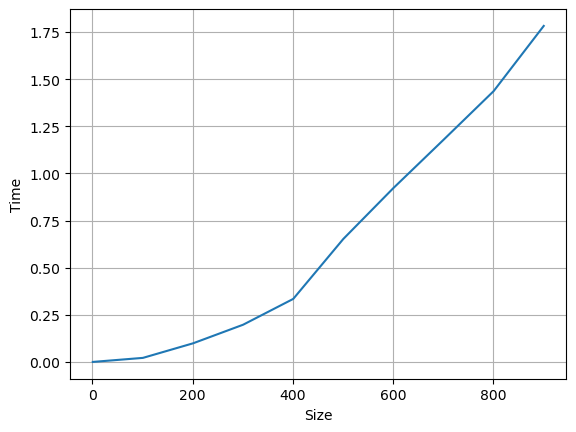

In [16]:
import numpy.linalg as la
import numpy.random
import numpy as np 
from numpy.random import randn
import matplotlib.pyplot as plt 
import time

N = np.arange(1,1000,100)
T_eig = np.zeros(len(N))


def time_eigen_average(N):
    
    trail_number = 10
    trail = range(trail_number)
    running = 0
    
    for i in trail:
        
        A = randn(N,N)
        start = time.time()
        B = la.eigvals(A)
        end = time.time()
        running += end - start
        
    return running/trail_number

for i in range(len(N)):
    
    T_eig[i] = time_eigen_average(N[i])
    
plt.plot(N, T_eig)
plt.grid()
plt.ylabel("Time")
plt.xlabel("Size")
plt.show()

## Problem 3
Generate a random $10\times 7$ matrix, $A$, and compute its SVD. Demonstrate that these results actually satisfy the definition of the SVD.

In [19]:
A = randn(10,7)
U,S,VT = la.svd(A,full_matrices=False)
S = np.diag(S)

# We want to know whether  A = U.S.VT
B = np.dot(np.dot(U,S),VT)

print (la.norm(A-B))

2.0380870140298705e-14


## Problem 4
Show that the operator norm of a matrix is its first (largest) singular value:
$$\lVert A\rVert_{op} = \sigma_1$$
Hint: $\lVert A\cdot B\rVert_{op} \leq \lVert A\rVert_{op}\cdot\lVert B\rVert_{op}$.

$$A=U.\sum .V^T$$
$$\lVert A\rVert_{op} =\lVert U \cdot \sum \cdot V^T\rVert_{op} \leq \lVert U\rVert_{op}\cdot\lVert \sum \rVert_{op}\cdot\lVert V^T\rVert_{op}$$
Given the fact that U and VT are  unitary, we have : 
$$\lVert A\rVert_{op} \leq \lVert \sum \rVert_{op}$$
We know that (i) $\sigma_1 \geq \sigma_2 \geq ... \geq \sigma_m$ and (ii) $\lVert \sum \rVert_{op} = \sqrt {\sigma_1^2 + \sigma_2^2 + ...+ \sigma_m^2}$, therefore
$$\lVert A\rVert_{op} = \sigma_1$$

## Exploration

In [20]:
# I tried to find a faster way to calculate SVD and I find this article by meta:
# the method is called Fast Randomized SVD and they use randomized matrix approximation based on
# a 2009 paper by Halko et al.
# Meta shows that for a 10^6 * 10^5 matrix with 10^7 non-zeros, it only takes 1 second to compute SVD
# compared to ARPACK (scipy.sparse.linal.svds) which takes 60 seconds to do the same job.